In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
mydata = pd.read_csv("patients.csv")
#Preview voice dataset
mydata.head()
print(mydata.shape)

(300000, 15)


In [3]:

#Create dummy variables
gender_dummies = pd.get_dummies(mydata['Gender'])
day_dummies = pd.get_dummies(mydata['DayOfTheWeek'])
status_dummies = pd.get_dummies(mydata['Status'])
df = pd.concat([mydata,gender_dummies,day_dummies,status_dummies],axis=1)

dataframe = df.drop(['Gender','Status','AppointmentRegistration','ApointmentData','DayOfTheWeek','Show-Up'], 1)
dataframe = dataframe[dataframe.Sms_Reminder != 2]


In [4]:

#Create train, validate, and test datasets
train, validate, test = np.split(dataframe.sample(frac=1), [int(.6*len(dataframe)), int(.8*len(dataframe))])

X_train = train.iloc[:,0:18]
X_validate = validate.iloc[:,0:18]
X_test = test.iloc[:,0:18]
y_train = list(train['No-Show'].values)
y_validate = list(validate['No-Show'].values)
y_test = list(test['No-Show'].values)


Best cross-validation accuracy: 0.6969
Validate set score: 0.6999
Best parameters: {'tree__max_depth': 1, 'tree__min_samples_split': 2}


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\

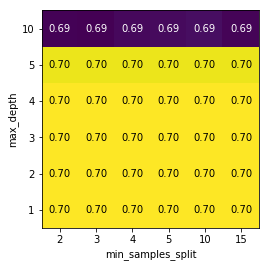

In [ ]:

#Fit decision tree model
pipe = Pipeline([("scaler", MinMaxScaler()), ("tree", DecisionTreeClassifier())])

param_grid = {'tree__max_depth': [1, 2, 3, 4, 5, 10],
              'tree__min_samples_split': [2, 3, 4, 5, 10, 15]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))
print("Validate set score: {:.4f}".format(grid.score(X_validate, y_validate)))
print("Best parameters: {}".format(grid.best_params_))

results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='min_samples_split', xticklabels=param_grid['tree__min_samples_split'],
                      ylabel='max_depth', yticklabels=param_grid['tree__max_depth'], cmap="viridis")

plt.show()


Best cross-validation accuracy: 0.6983
Validate set score: 0.6966
Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\

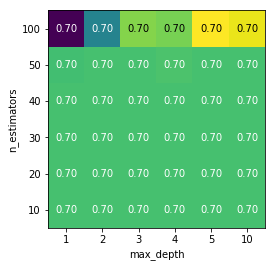

In [5]:

#Fit random forests model
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier())])

param_grid = {'rf__n_estimators': [10, 20, 30, 40, 50, 100],
              'rf__max_depth': [1, 2, 3, 4, 5, 10]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))
print("Validate set score: {:.4f}".format(grid.score(X_validate, y_validate)))
print("Best parameters: {}".format(grid.best_params_))

results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=param_grid['rf__max_depth'],
                      ylabel='n_estimators', yticklabels=param_grid['rf__n_estimators'], cmap="viridis")

plt.show()


Best cross-validation accuracy: 0.6985
Validate set score: 0.6963
Best parameters: {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': 1000}


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\

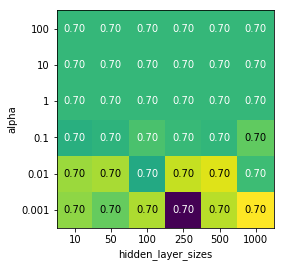

In [6]:

#Fit multilayer perceptron model
pipe = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPClassifier(max_iter=1000000))])

param_grid = {'mlp__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'mlp__hidden_layer_sizes': [10, 50, 100, 250, 500, 1000]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))
print("Validate set score: {:.4f}".format(grid.score(X_validate, y_validate)))
print("Best parameters: {}".format(grid.best_params_))

results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='hidden_layer_sizes', xticklabels=param_grid['mlp__hidden_layer_sizes'],
                      ylabel='alpha', yticklabels=param_grid['mlp__alpha'], cmap="viridis")

plt.show()


In [7]:

#Fit top model with best parameters
mlp = MLPClassifier(hidden_layer_sizes=[100], alpha=0.01).fit(X_train, y_train)
print("Accuracy on test set: {:.4f}".format(mlp.score(X_test, y_test)))

Accuracy on test set: 0.6973
